## Libraries

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.float_format = '{:.2f}'.format

### Load the Data from Local

In [145]:
data = pd.read_csv('used_car_prices_dataset_final.csv')

### Exploratory Data Analysis

In [146]:
data.shape

(4666, 10)

In [147]:
data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CarAge,4666.00,10.27,5.94,1.00,5.00,10.00,15.00,30.00
Mileage,4666.00,51426.43,24202.42,-26733.11,36405.52,49959.17,64324.46,150000.00
OwnerCount,4533.00,2.48,1.14,1.00,1.00,2.00,4.00,4.00
EngineSize,4666.00,2.04,0.58,-0.24,1.67,2.02,2.36,5.00
Horsepower,4666.00,149.85,39.99,-28.62,122.89,149.58,176.63,291.70
ResalePrice,4666.00,52181.77,12106.95,-599.85,44039.24,52222.64,60278.03,94400.29


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [150]:
data.isna().sum()

,0
CarAge,0
Mileage,0
Brand,0
FuelType,0
Transmission,0
OwnerCount,133
EngineSize,0
Horsepower,0
CarCondition,0
ResalePrice,0


In [151]:
data.duplicated().sum()

0

## Finding Outlier

In [152]:
num_col = data.select_dtypes(include='number').columns

CarAge


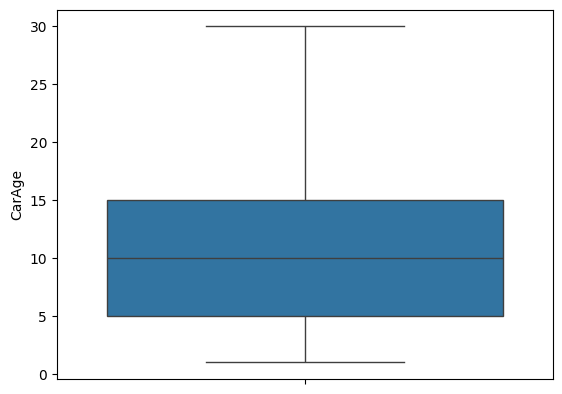

Mileage


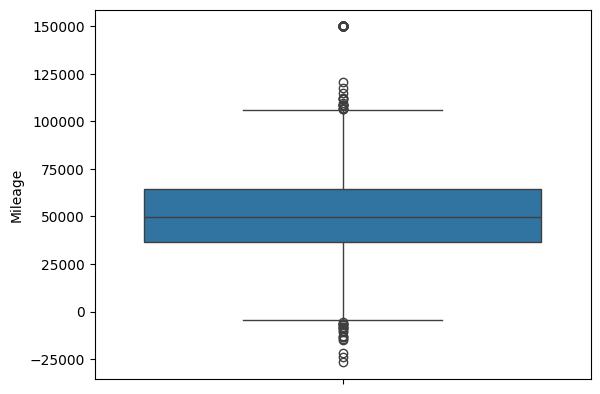

OwnerCount


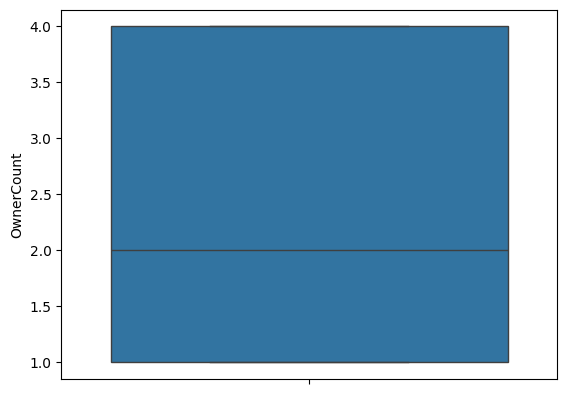

EngineSize


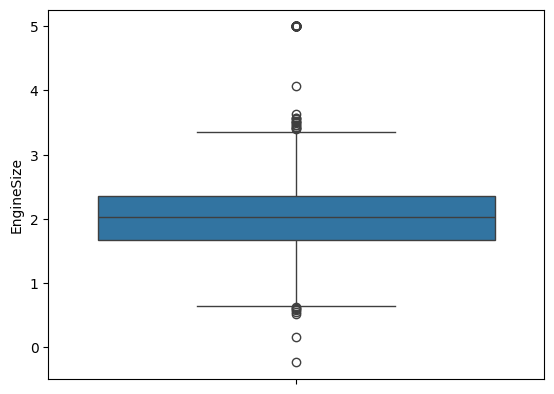

Horsepower


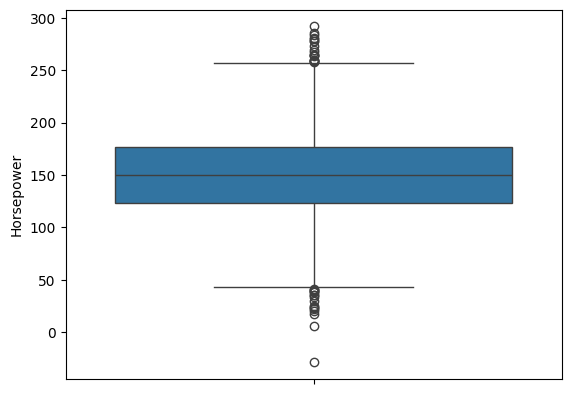

ResalePrice


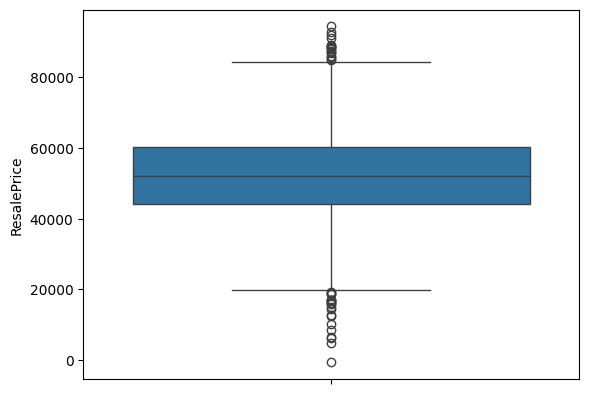

In [153]:
for col in num_col:
    print(col)
    sns.boxplot(data[col])
    plt.show()

In [154]:
data.head(5)

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51


In [155]:
data.tail(5)

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89
4665,18,56126.95,Toyota,Petrol,Manual,1.00,0.99,173.37,Fair,43329.19


In [156]:
data['OwnerCount'].value_counts()

,count
OwnerCount,
1.00,1207
4.00,1151
3.00,1089
2.00,1086


## Correlation

In [157]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,0.03,0.03,0.01,-0.48
Mileage,0.06,1.00,0.01,0.06,-0.00,-0.21
OwnerCount,0.03,0.01,1.00,-0.01,0.02,0.01
EngineSize,0.03,0.06,-0.01,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.01,0.20,0.65,1.00


<Axes: >

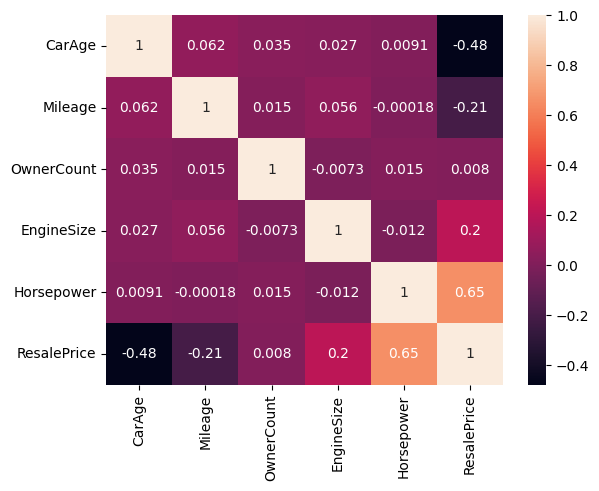

In [158]:
sns.heatmap(data[num_col].corr(), annot = True)

## Pairplot

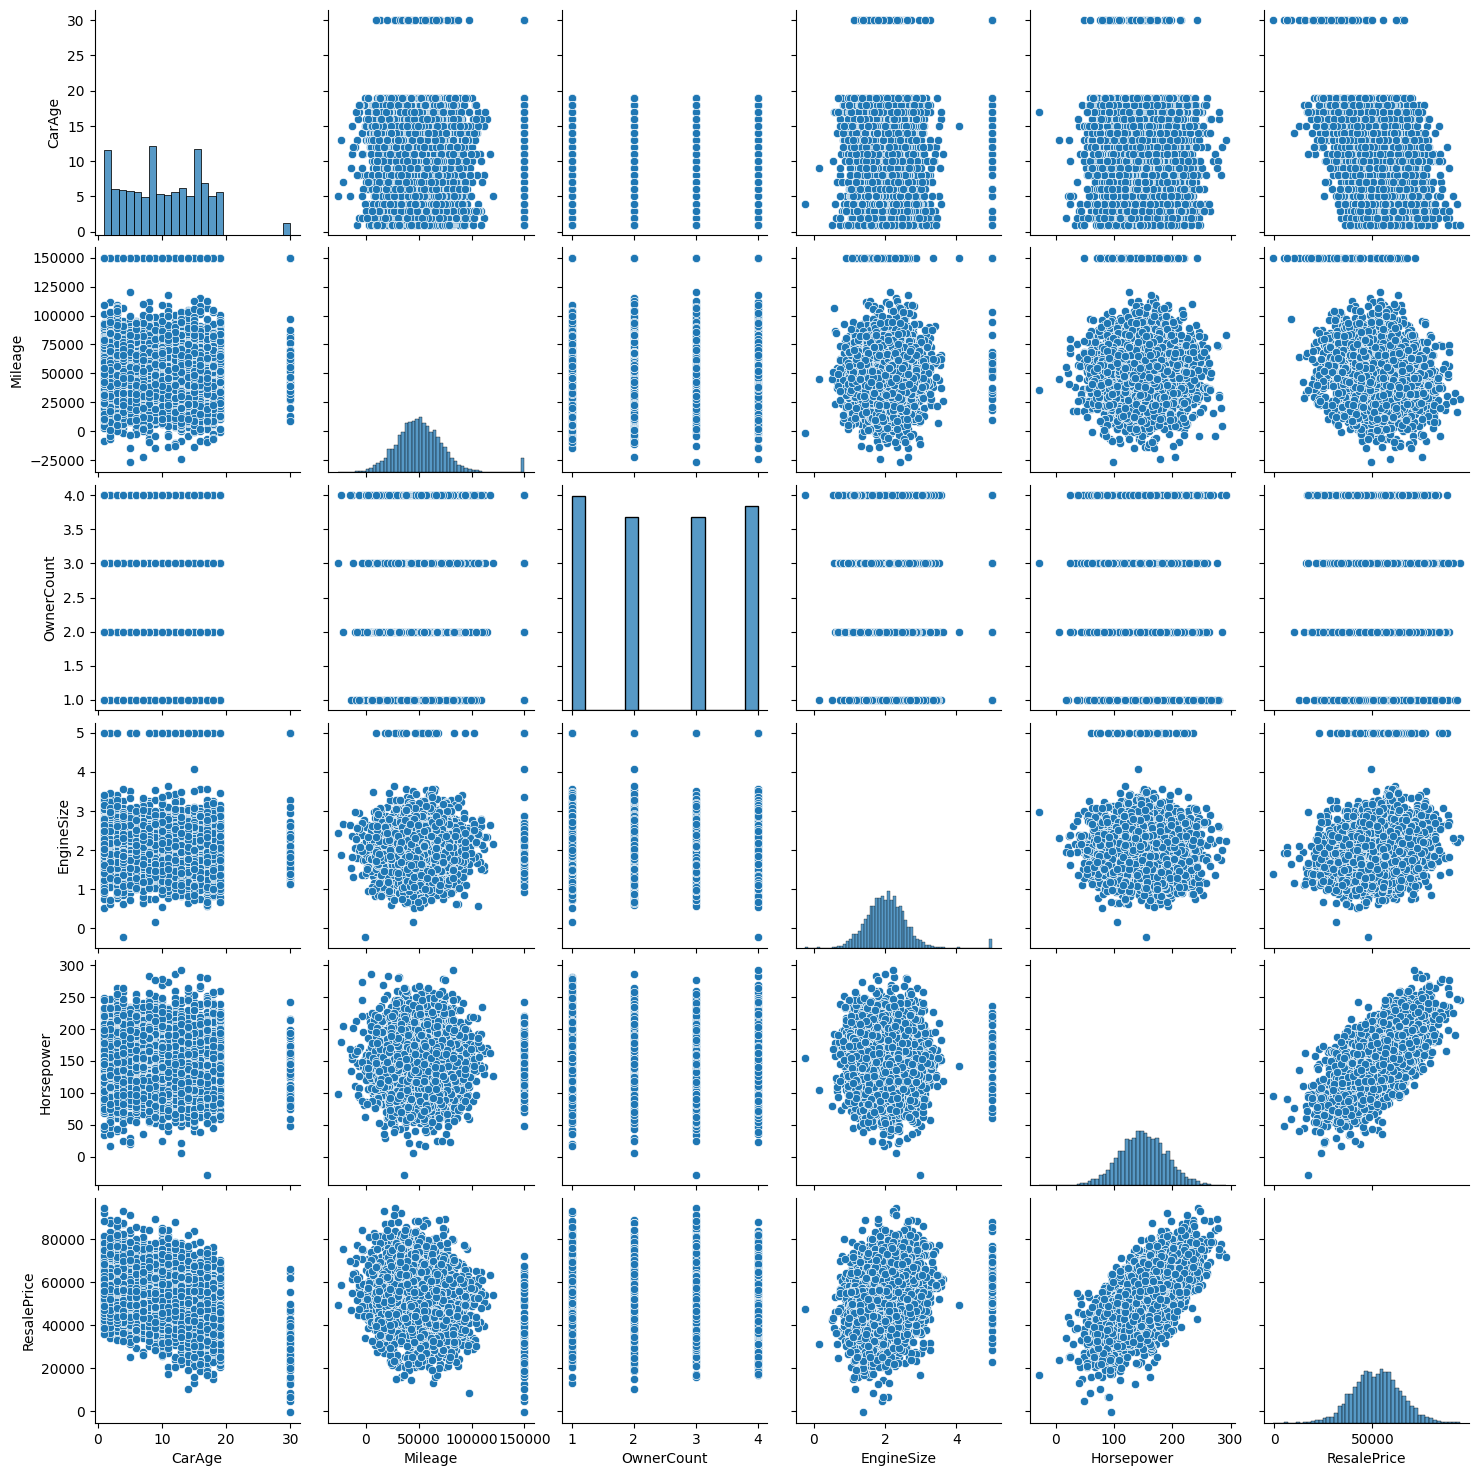

In [159]:
sns.pairplot(data[num_col])

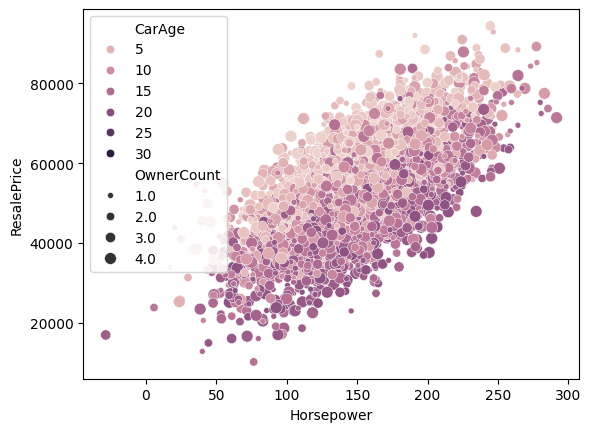

In [160]:
sns.scatterplot(x = data['Horsepower'], y = data['ResalePrice'], hue = data['CarAge'], size = data['OwnerCount'])
plt.savefig('Horsepower_ResalePrice_scatter.png')

## Preprocessing

In [161]:
data['OwnerCount'].mode()[0]

1.0

In [162]:
data['OwnerCount'].fillna(data['OwnerCount'].mode()[0],inplace=True)

In [163]:
data.isna().sum()

,0
CarAge,0
Mileage,0
Brand,0
FuelType,0
Transmission,0
OwnerCount,0
EngineSize,0
Horsepower,0
CarCondition,0
ResalePrice,0


In [164]:
data[data['Mileage'] >= 150000]

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
37,8,150000.00,Kia,Petrol,Automatic,2.00,2.49,119.01,Poor,40525.58
74,17,150000.00,Nissan,Electric,Manual,2.00,2.73,182.45,Good,52703.23
149,5,150000.00,Nissan,Petrol,Manual,4.00,1.13,126.08,Poor,50469.66
186,30,150000.00,Mercedes,Diesel,Manual,1.00,2.06,242.42,Fair,42626.82
261,3,150000.00,BMW,Diesel,Automatic,3.00,5.00,71.11,Poor,52718.75
...,...,...,...,...,...,...,...,...,...,...
4405,14,150000.00,Kia,Diesel,Automatic,3.00,2.55,209.41,Good,58824.06
4442,8,150000.00,BMW,Petrol,Manual,1.00,5.00,112.15,Fair,43503.34
4517,5,150000.00,Honda,Electric,Manual,2.00,2.42,176.56,Excellent,57268.13
4554,1,150000.00,BMW,Petrol,Automatic,3.00,2.29,191.60,Good,58749.16


In [165]:
data = data[data['Mileage'] < 150000]

In [166]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [167]:
data[data['EngineSize'] >= 5]

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
65,15,47446.91,Ford,Electric,Automatic,3.00,5.00,189.33,Excellent,83768.01
130,9,30686.70,Honda,Petrol,Manual,3.00,5.00,59.90,Good,46455.67
326,30,9630.24,Hyundai,Electric,Automatic,1.00,5.00,194.27,Fair,48636.43
457,19,28052.63,Mercedes,Hybrid,Automatic,3.00,5.00,111.34,Poor,51121.43
653,30,83573.49,Kia,Electric,Automatic,1.00,5.00,142.99,Good,48936.16
718,2,51722.22,Toyota,Diesel,Automatic,1.00,5.00,159.22,Poor,67076.88
849,11,20318.87,Kia,Hybrid,Manual,1.00,5.00,154.56,Fair,65064.30
914,16,55532.02,BMW,Electric,Manual,1.00,5.00,235.26,Good,72406.51
1110,3,66178.39,Honda,Petrol,Manual,1.00,5.00,121.37,Excellent,65129.04
1241,16,58192.72,Hyundai,Electric,Manual,2.00,5.00,137.14,Excellent,43135.68


In [168]:
data = data[data['EngineSize'] < 5]

In [169]:
data.shape

(4547, 10)

In [170]:
data[data['CarAge'] >= 30]

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
46,30,60445.01,Hyundai,Hybrid,Automatic,1.00,1.72,134.55,Excellent,29761.03
93,30,42773.79,Ford,Diesel,Manual,1.00,1.95,110.13,Excellent,14524.22
233,30,45280.60,Ford,Hybrid,Automatic,1.00,2.01,133.91,Good,31211.02
466,30,13124.13,Ford,Petrol,Automatic,1.00,1.59,171.84,Poor,31000.07
513,30,67750.08,Kia,Petrol,Automatic,1.00,1.32,193.84,Excellent,35811.96
606,30,26976.93,Hyundai,Petrol,Automatic,1.00,2.52,123.64,Fair,38746.96
793,30,37782.85,Audi,Electric,Manual,1.00,1.50,103.57,Excellent,31040.04
886,30,65094.67,Ford,Hybrid,Automatic,1.00,2.29,145.65,Poor,27383.95
1026,30,33096.92,Honda,Electric,Manual,1.00,2.28,82.95,Fair,21109.33
1073,30,60016.63,BMW,Hybrid,Manual,1.00,2.04,197.83,Poor,42519.19


In [171]:
data = data[data['CarAge'] < 30]

In [172]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [173]:
data['CarCondition'].value_counts()

,count
CarCondition,
Fair,1155
Excellent,1153
Poor,1104
Good,1093


In [174]:
data['Transmission'].value_counts()

,count
Transmission,
Manual,2291
Automatic,2214


In [175]:
data['FuelType'].value_counts()

,count
FuelType,
Diesel,1181
Hybrid,1130
Electric,1106
Petrol,1088


## Encoding

In [176]:
mapping_carCondition = {'Excellent':1, 'Good':2, 'Fair':3, 'Poor':4}
mapping_Transmission = {'Manual':1, 'Automatic':2}
mapping_FuelType = {'Diesel':1,'Petrol':2,'Hybrid':3,'Electric':4}

In [177]:
data['CarCondition'] = data['CarCondition'].map(mapping_carCondition)
data['Transmission'] = data['Transmission'].map(mapping_Transmission)
data['FuelType'] = data['FuelType'].map(mapping_FuelType)

<ipython-input-177-360b18428388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CarCondition'] = data['CarCondition'].map(mapping_carCondition)
<ipython-input-177-360b18428388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transmission'] = data['Transmission'].map(mapping_Transmission)
<ipython-input-177-360b18428388>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [178]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,4,1,3.00,1.86,116.78,4,37380.23
1,11,72118.01,Honda,4,2,4.00,2.46,150.06,3,58279.18
2,8,38721.05,Ford,3,1,2.00,1.67,140.58,3,52420.52
3,7,33675.66,Kia,2,2,3.00,2.80,157.02,4,54195.80
4,19,51562.86,Mercedes,2,2,4.00,2.42,196.91,3,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,3,1,2.00,1.84,170.18,3,56808.96
4662,4,66193.15,Hyundai,1,2,4.00,1.84,162.18,4,56224.63
4663,1,54614.23,Ford,4,2,2.00,2.48,178.08,1,68440.02
4664,7,52035.77,Toyota,3,1,4.00,1.63,191.21,1,64847.89


In [179]:
data.tail(10)

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
4656,1,31684.90,BMW,3,1,2.00,2.02,145.30,2,55651.32
4657,12,54992.19,BMW,4,2,3.00,2.10,145.16,1,46343.53
4658,2,1185.92,Audi,1,1,2.00,1.51,81.85,3,52188.04
4659,4,46314.22,Kia,2,1,1.00,2.30,135.69,3,44320.12
4660,17,45883.20,Ford,1,1,1.00,1.05,211.42,2,55289.13
4661,4,22710.58,Audi,3,1,2.00,1.84,170.18,3,56808.96
4662,4,66193.15,Hyundai,1,2,4.00,1.84,162.18,4,56224.63
4663,1,54614.23,Ford,4,2,2.00,2.48,178.08,1,68440.02
4664,7,52035.77,Toyota,3,1,4.00,1.63,191.21,1,64847.89
4665,18,56126.95,Toyota,2,1,1.00,0.99,173.37,3,43329.19


In [180]:
data['Brand'].value_counts()

,count
Brand,
Ford,516
BMW,513
Toyota,506
Kia,505
Mercedes,503
Hyundai,503
Audi,498
Honda,483
Nissan,478


In [181]:
data = pd.get_dummies(data, columns=['Brand'],dtype='int' )

In [182]:
data

,CarAge,Mileage,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota
0,15,70539.73,4,1,3.00,1.86,116.78,4,37380.23,0,0,0,1,0,0,0,0,0
1,11,72118.01,4,2,4.00,2.46,150.06,3,58279.18,0,0,0,1,0,0,0,0,0
2,8,38721.05,3,1,2.00,1.67,140.58,3,52420.52,0,0,1,0,0,0,0,0,0
3,7,33675.66,2,2,3.00,2.80,157.02,4,54195.80,0,0,0,0,0,1,0,0,0
4,19,51562.86,2,2,4.00,2.42,196.91,3,57287.51,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,3,1,2.00,1.84,170.18,3,56808.96,1,0,0,0,0,0,0,0,0
4662,4,66193.15,1,2,4.00,1.84,162.18,4,56224.63,0,0,0,0,1,0,0,0,0
4663,1,54614.23,4,2,2.00,2.48,178.08,1,68440.02,0,0,1,0,0,0,0,0,0
4664,7,52035.77,3,1,4.00,1.63,191.21,1,64847.89,0,0,0,0,0,0,0,0,1


## Scaling

In [183]:
scaling = StandardScaler()

In [184]:
X = data.drop(columns='ResalePrice')

In [185]:
X.columns

Index(['CarAge', 'Mileage', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'Brand_Audi', 'Brand_BMW',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes', 'Brand_Nissan', 'Brand_Toyota'],
      dtype='object')

In [186]:
scaled_features = X.columns

In [187]:
data[scaled_features] = scaling.fit_transform(data[scaled_features])

In [188]:
data

,CarAge,Mileage,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota
0,0.92,1.02,1.35,-0.98,0.47,-0.30,-0.83,1.35,37380.23,-0.35,-0.36,-0.36,2.89,-0.35,-0.36,-0.35,-0.34,-0.36
1,0.19,1.10,1.35,1.02,1.35,0.93,0.00,0.46,58279.18,-0.35,-0.36,-0.36,2.89,-0.35,-0.36,-0.35,-0.34,-0.36
2,-0.36,-0.53,0.46,-0.98,-0.40,-0.69,-0.24,0.46,52420.52,-0.35,-0.36,2.78,-0.35,-0.35,-0.36,-0.35,-0.34,-0.36
3,-0.54,-0.78,-0.43,1.02,0.47,1.60,0.18,1.35,54195.80,-0.35,-0.36,-0.36,-0.35,-0.35,2.81,-0.35,-0.34,-0.36
4,1.64,0.10,-0.43,1.02,1.35,0.84,1.17,0.46,57287.51,-0.35,-0.36,-0.36,-0.35,-0.35,-0.36,2.82,-0.34,-0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,-1.09,-1.32,0.46,-0.98,-0.40,-0.34,0.51,0.46,56808.96,2.84,-0.36,-0.36,-0.35,-0.35,-0.36,-0.35,-0.34,-0.36
4662,-1.09,0.81,-1.32,1.02,1.35,-0.34,0.31,1.35,56224.63,-0.35,-0.36,-0.36,-0.35,2.82,-0.36,-0.35,-0.34,-0.36
4663,-1.63,0.24,1.35,1.02,-0.40,0.95,0.70,-1.33,68440.02,-0.35,-0.36,2.78,-0.35,-0.35,-0.36,-0.35,-0.34,-0.36
4664,-0.54,0.12,0.46,-0.98,1.35,-0.77,1.03,-1.33,64847.89,-0.35,-0.36,-0.36,-0.35,-0.35,-0.36,-0.35,-0.34,2.81


In [189]:
data.corr()

,CarAge,Mileage,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota
CarAge,1.00,0.01,-0.02,-0.00,0.03,-0.02,0.02,-0.04,-0.45,-0.01,-0.01,-0.01,0.03,0.00,-0.01,-0.02,0.02,0.02
Mileage,0.01,1.00,0.01,-0.00,0.00,0.01,0.02,-0.01,-0.16,-0.00,-0.02,0.01,0.02,0.01,-0.01,0.00,-0.01,-0.01
FuelType,-0.02,0.01,1.00,-0.00,0.01,0.01,-0.00,-0.01,-0.00,0.01,0.02,-0.01,-0.00,0.00,0.02,0.01,-0.05,-0.00
Transmission,-0.00,-0.00,-0.00,1.00,0.01,-0.00,-0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.01
OwnerCount,0.03,0.00,0.01,0.01,1.00,0.00,0.02,-0.02,0.01,0.01,0.01,-0.00,0.01,0.01,-0.02,0.01,0.00,-0.01
EngineSize,-0.02,0.01,0.01,-0.00,0.00,1.00,-0.02,-0.01,0.22,0.01,-0.01,-0.01,-0.03,0.00,0.00,0.01,0.03,-0.01
Horsepower,0.02,0.02,-0.00,-0.01,0.02,-0.02,1.00,-0.00,0.67,0.02,0.01,0.01,0.01,0.01,0.00,-0.01,-0.02,-0.02
CarCondition,-0.04,-0.01,-0.01,-0.01,-0.02,-0.01,-0.00,1.00,-0.12,-0.03,0.01,0.02,-0.02,0.00,0.01,-0.00,0.01,-0.00
ResalePrice,-0.45,-0.16,-0.00,0.01,0.01,0.22,0.67,-0.12,1.00,0.02,0.01,0.01,-0.01,-0.01,0.02,-0.01,-0.01,-0.03
Brand_Audi,-0.01,-0.00,0.01,-0.00,0.01,0.01,0.02,-0.03,0.02,1.00,-0.13,-0.13,-0.12,-0.12,-0.13,-0.12,-0.12,-0.13


In [190]:
X = data.drop(columns='ResalePrice')
y = data['ResalePrice']

## Data Split

In [191]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

## Model

In [192]:
model = LinearRegression()

In [193]:
model.fit(train_X, train_y)

LinearRegression()

In [194]:
model.coef_

array([-5.46659209e+03, -1.96191577e+03, -1.67389417e+02, -4.28425919e+01,
        2.40086418e+02,  2.60935602e+03,  7.98117170e+03, -1.58077879e+03,
       -2.47832774e+17, -2.51066255e+17, -2.51704665e+17, -2.44528225e+17,
       -2.48918360e+17, -2.49350407e+17, -2.48918360e+17, -2.43410416e+17,
       -2.49565965e+17])

<Axes: >

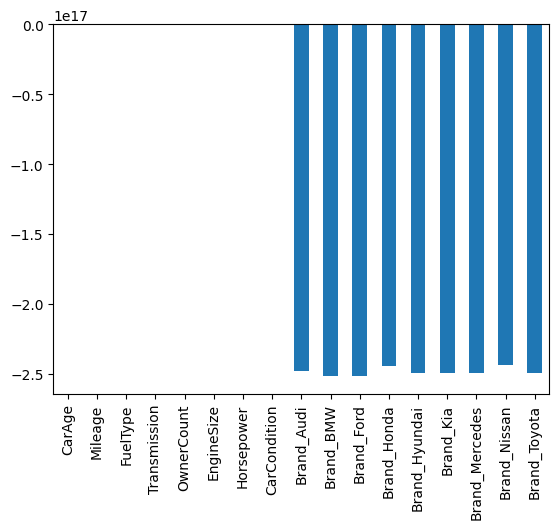

In [195]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [196]:
model.intercept_

52560.28200637782

## Prediction

In [197]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

## Evaluation

In [198]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred))
    print("R2 score")
    print(r2_score(actual, pred))
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [199]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
34024725.08849698
RMSE
5833.07166838339
MAPE
0.09447415444943585
R2 score
0.7527674291649437
TEST DATA RESULT
MSE
34387418.62144628
RMSE
5864.078667740251
MAPE
0.09514673137029823
R2 score
0.7436903524028468


In [200]:
res = [train_result] + [test_result]
res

[[34024725.08849698,
  5833.07166838339,
  0.7527674291649437,
  0.09447415444943585],
 [34387418.62144628,
  5864.078667740251,
  0.7436903524028468,
  0.09514673137029823]]

In [201]:
pd.DataFrame(res, columns=['MSE','RMSE','MAPE','R2 score'], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 score
Train,34024725.09,5833.07,0.75,0.09
Test,34387418.62,5864.08,0.74,0.10


## Feature Selection

In [202]:
select_k_best = SelectKBest(f_regression, k= 5 )

In [203]:
X_select = select_k_best.fit_transform(X,y)

In [204]:
select_k_best.get_support()

array([ True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False])

In [205]:
X.columns

Index(['CarAge', 'Mileage', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'Brand_Audi', 'Brand_BMW',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes', 'Brand_Nissan', 'Brand_Toyota'],
      dtype='object')

In [206]:
selected_feature_names = X.columns[select_k_best.get_support()]

In [207]:
selected_feature_names

Index(['CarAge', 'Mileage', 'EngineSize', 'Horsepower', 'CarCondition'], dtype='object')

## Model After Feature Selection

In [208]:
X = X[selected_feature_names]

In [209]:
X = X[selected_feature_names]
y = data['ResalePrice']

In [210]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

In [211]:
train_X.shape

(3153, 5)

In [212]:
model = LinearRegression()

In [213]:
model.fit(train_X, train_y)

LinearRegression()

In [214]:
model.coef_

array([-5428.30346566, -1959.8190502 ,  2506.90001573,  8014.08646769,
       -1625.66565568])

<Axes: >

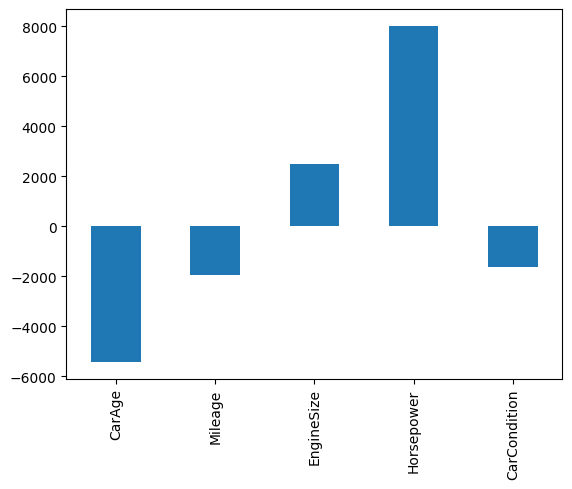

In [215]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [216]:
model.intercept_

52582.70833015879

In [217]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [218]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred))
    print("R2 score")
    print(r2_score(actual, pred))
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [219]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
34117232.28409557
RMSE
5840.995829830353
MAPE
0.09487538560343586
R2 score
0.7520952476343333
TEST DATA RESULT
MSE
34123286.82486526
RMSE
5841.514086678663
MAPE
0.0947988041794568
R2 score
0.745659081967754


In [220]:
res = [train_result] + [test_result]
res

[[34117232.28409557,
  5840.995829830353,
  0.7520952476343333,
  0.09487538560343586],
 [34123286.82486526, 5841.514086678663, 0.745659081967754, 0.0947988041794568]]

In [221]:
pd.DataFrame(res, columns=['MSE','RMSE','R2 Score','MAPE'], index = ['Train', 'Test'])

,MSE,RMSE,R2 Score,MAPE
Train,34117232.28,5841.00,0.75,0.09
Test,34123286.82,5841.51,0.75,0.09


Hence Train and Test almost matching so, stop itrating the process and found this as min Error.

# Conclustion : Train and Test almost matching so, stop itrating the process and found this as min Error.